## CO2 Emission Prediction from Vehicles using Multiple Linear Regression

### Importing Libraries

In [246]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import random

### Loading Data

In [247]:
df = pd.read_csv('FuelConsumption.csv')
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [249]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Data Preprocessing

In [250]:
df = df.dropna()
df.shape

(1067, 13)

#### Dependent Attributes on Target

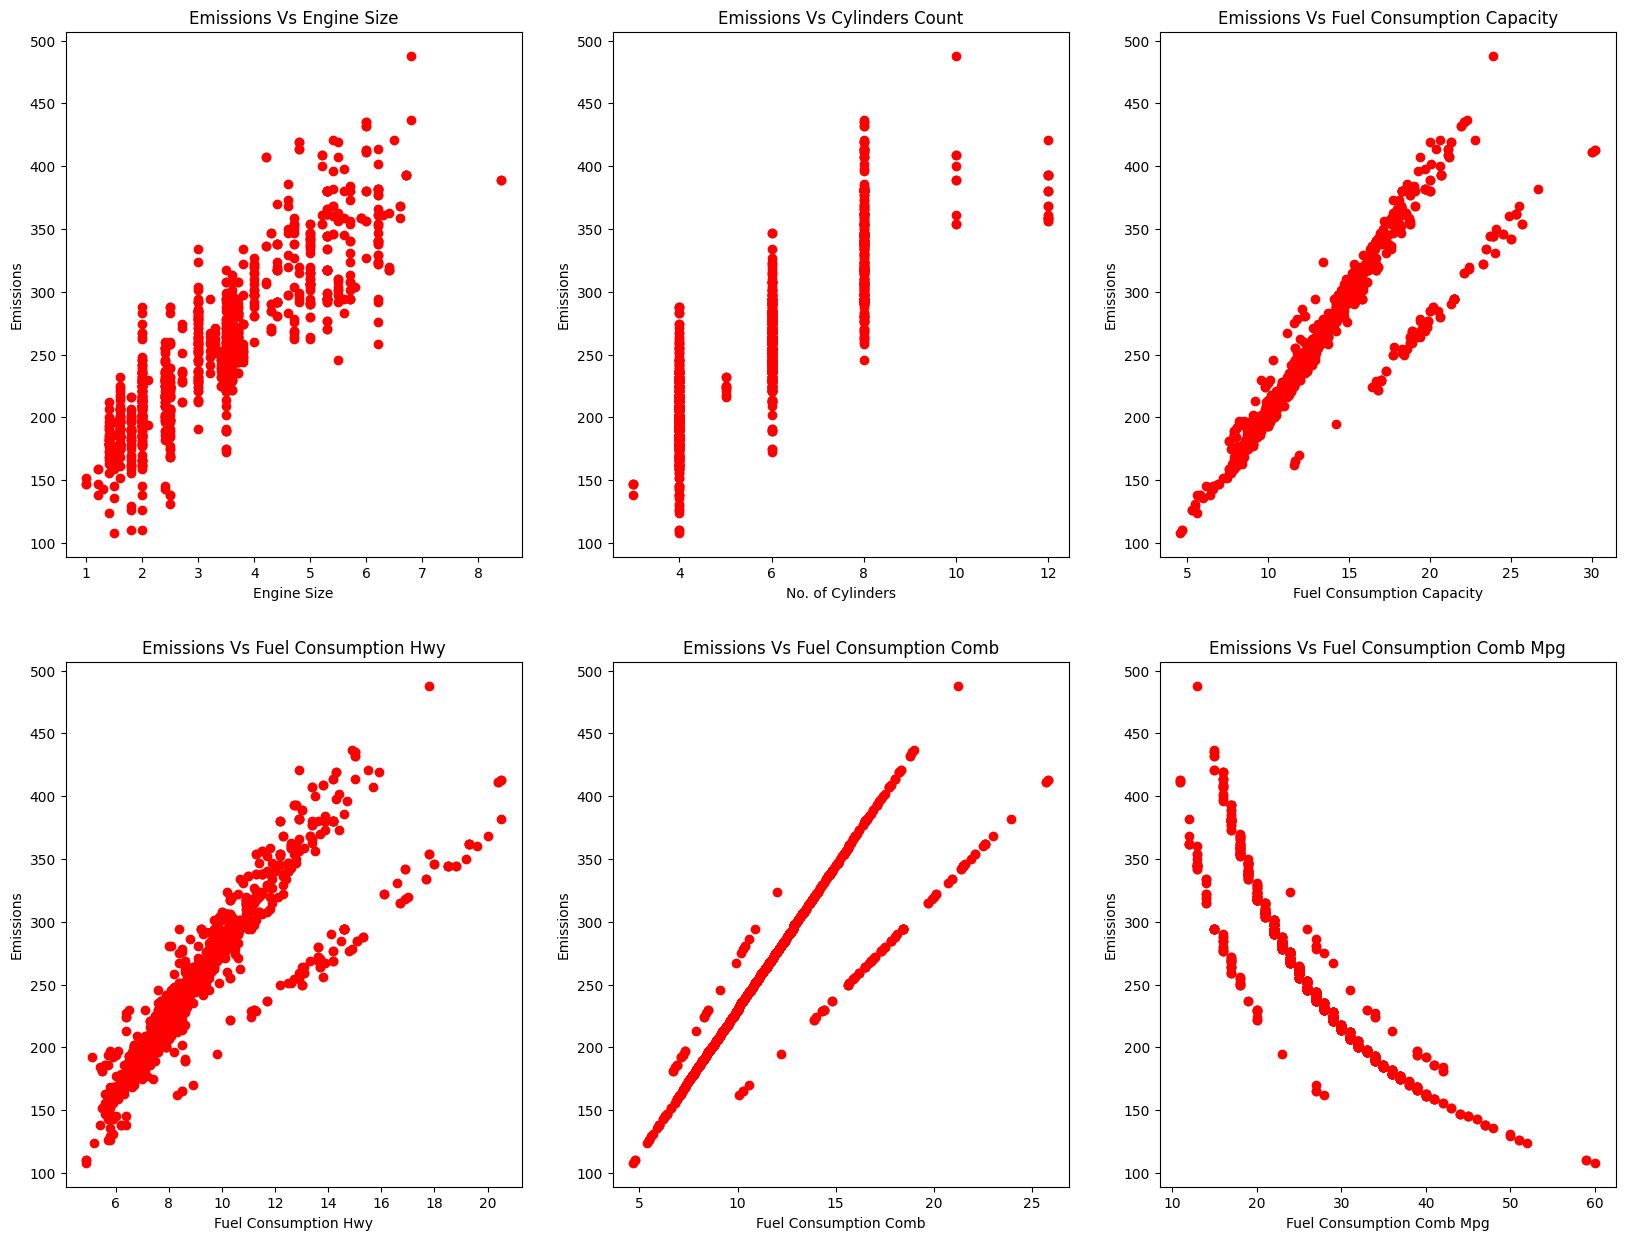

In [251]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(20)
plt.subplot(2, 3, 1)
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='red')
plt.title('Emissions Vs Engine Size')
plt.xlabel("Engine Size")
plt.ylabel("Emissions")
plt.subplot(2, 3, 2)
plt.scatter(df.CYLINDERS, df.CO2EMISSIONS,  color='red')
plt.title('Emissions Vs Cylinders Count')
plt.xlabel("No. of Cylinders")
plt.ylabel("Emissions")
plt.subplot(2, 3, 3)
plt.scatter(df.FUELCONSUMPTION_CITY, df.CO2EMISSIONS,  color='red')
plt.title('Emissions Vs Fuel Consumption Capacity')
plt.xlabel("Fuel Consumption Capacity")
plt.ylabel("Emissions")
plt.subplot(2, 3, 4)
plt.scatter(df.FUELCONSUMPTION_HWY, df.CO2EMISSIONS,  color='red')
plt.title('Emissions Vs Fuel Consumption Hwy')
plt.xlabel("Fuel Consumption Hwy")
plt.ylabel("Emissions")
plt.subplot(2, 3, 5)
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS,  color='red')
plt.title('Emissions Vs Fuel Consumption Comb')
plt.xlabel("Fuel Consumption Comb")
plt.ylabel("Emissions")
plt.subplot(2, 3, 6)
plt.scatter(df.FUELCONSUMPTION_COMB_MPG, df.CO2EMISSIONS,  color='red')
plt.title('Emissions Vs Fuel Consumption Comb Mpg')
plt.xlabel("Fuel Consumption Comb Mpg")
plt.ylabel("Emissions")
plt.show()

### Splitting Data

In [252]:
from sklearn.preprocessing import MinMaxScaler
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
          'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']]
# scaling data between 0 & 1
scaler = MinMaxScaler()
cdf = scaler.fit_transform(cdf)
cdf = pd.DataFrame(cdf, columns=[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
                                  'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']])
cdf.head()
# iloc can be used here.


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0.135135,0.111111,0.207031,0.115385,0.180095,0.448980,0.231579
1,0.189189,0.111111,0.257812,0.179487,0.232227,0.367347,0.297368
2,0.067568,0.111111,0.054688,0.057692,0.056872,0.755102,0.073684
3,0.337838,0.333333,0.316406,0.269231,0.303318,0.285714,0.386842
4,0.337838,0.333333,0.292969,0.243590,0.279621,0.326531,0.357895


In [253]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
                                                    'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']], cdf[['CO2EMISSIONS']], test_size=0.20, random_state=58)


In [254]:
print('Shape of Training Input Data: ', X_train.shape)
print('Shape of Training Output Data: ', Y_train.shape)
print('Shape of Testing Input Data: ', X_test.shape)
print('Shape of Testing Output Data: ', Y_test.shape)

Shape of Training Input Data:  (853, 6)
Shape of Training Output Data:  (853, 1)
Shape of Testing Input Data:  (214, 6)
Shape of Testing Output Data:  (214, 1)


### Multiple Linear Regression

#### Training 

In [255]:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [256]:
model.fit (X_train, Y_train)
# The coefficients
print ('Coefficients: ', model.coef_)

Coefficients:  [[ 0.15822499  0.19370331 -0.59283727 -0.05054479  0.76012876 -0.4982327 ]]


In [257]:
# The intercepts
print('Intercept: ', model.intercept_)

Intercept:  [0.40497788]


#### Prediction

In [258]:
Y_predict = model.predict(X_test)

#### Cost / Loss

In [259]:
from sklearn.metrics import mean_squared_error
cost = mean_squared_error(Y_test, Y_predict)

In [260]:
print('Cost is: ', cost)
# Explained variance score: 1 is perfect prediction
print('Explained Variance score: %.2f' % model.score(X_train, Y_train))

Cost is:  0.0033347585418239418
Explained Variance score: 0.89


In [261]:
Y_test.head()

,CO2EMISSIONS
18,0.660526
512,0.386842
497,0.181579
1038,0.260526
153,0.315789


In [262]:
Y_predict = pd.DataFrame(Y_predict, columns = ['CO2EMISSIONS'])
Y_predict.head()

,CO2EMISSIONS
0,0.689687
1,0.347117
2,0.188735
3,0.261322
4,0.282680


#### Performance Testing

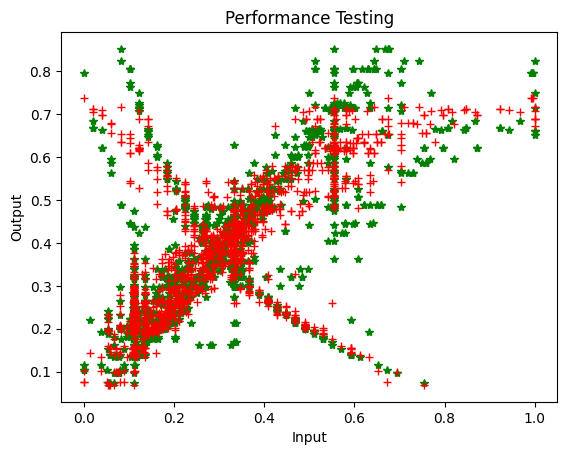

In [263]:
plt.plot(X_test, Y_test, '*', color='green')
plt.plot(X_test, Y_predict, '+', color='red')
plt.title('Performance Testing')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

## Generating Weights for CAD VLSI Xilinx Vivado

In [264]:
train = cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
             'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']]
test = cdf[['CO2EMISSIONS']]
weight_coef = []
weight_intercept = []
weight_cost = []
itrs = 400
for i in range(itrs):
    X_train, X_test, Y_train, Y_test = train_test_split(cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
                                                             'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']], cdf[['CO2EMISSIONS']], test_size=round(np.random.uniform(0.15, 0.35), 2), random_state=random.randint(50, 90))
    tmp = []
    model.fit (X_train, Y_train)
    Y_predict = model.predict(X_test)
    for j in model.coef_:
        tmp.append(j)
    weight_coef.append(np.array(tmp))
    weight_intercept.append(model.intercept_[0])
    weight_cost.append(round(mean_squared_error(Y_test, Y_predict), 4))
    


In [265]:
# printing cost weight
print(weight_cost)

[0.003, 0.0024, 0.0029, 0.0027, 0.0028, 0.0036, 0.0033, 0.0041, 0.0029, 0.0032, 0.0026, 0.0034, 0.004, 0.0026, 0.0034, 0.0034, 0.0026, 0.003, 0.0032, 0.0031, 0.0031, 0.0033, 0.0028, 0.0032, 0.0034, 0.0028, 0.0031, 0.003, 0.0031, 0.003, 0.0026, 0.0021, 0.0033, 0.0035, 0.0026, 0.0039, 0.0036, 0.0028, 0.0036, 0.0037, 0.0038, 0.003, 0.0038, 0.0026, 0.0033, 0.0025, 0.0036, 0.0035, 0.0039, 0.0029, 0.0029, 0.0039, 0.0034, 0.0032, 0.0035, 0.0026, 0.0035, 0.0037, 0.0035, 0.0037, 0.0033, 0.0027, 0.0031, 0.003, 0.0031, 0.0034, 0.0038, 0.0034, 0.0033, 0.003, 0.0035, 0.0038, 0.0033, 0.0028, 0.0032, 0.0031, 0.0027, 0.0039, 0.0041, 0.0032, 0.003, 0.0034, 0.0029, 0.0037, 0.0034, 0.0027, 0.0028, 0.003, 0.0038, 0.0032, 0.0031, 0.0026, 0.0033, 0.0025, 0.0034, 0.0027, 0.0031, 0.0037, 0.0033, 0.0025, 0.0035, 0.0029, 0.0037, 0.0031, 0.0035, 0.0035, 0.003, 0.0032, 0.0032, 0.0035, 0.003, 0.0026, 0.0032, 0.0034, 0.0028, 0.0032, 0.0022, 0.0028, 0.003, 0.0032, 0.0027, 0.003, 0.0025, 0.0035, 0.0034, 0.0027, 0.002

In [266]:
# printing coefficient weight
print(weight_coef)

[array([[ 0.18032123,  0.18708885, -1.60307381, -0.56743816,  2.31975075,
        -0.46502388]]), array([[ 0.1592136 ,  0.19281352, -0.75894623, -0.15787464,  1.05308834,
        -0.48986788]]), array([[ 0.19136465,  0.15833908, -0.7926702 , -0.16387037,  1.11094758,
        -0.48009276]]), array([[ 0.13448207,  0.21432851, -0.62457919, -0.1207856 ,  0.8650431 ,
        -0.50283982]]), array([[ 0.13621053,  0.2089581 , -0.5787651 , -0.06047223,  0.75406024,
        -0.5172444 ]]), array([[ 0.15031803,  0.18151237, -0.24956607,  0.12310098,  0.25264542,
        -0.52514342]]), array([[ 0.19169915,  0.15348415, -1.12942323, -0.38254374,  1.63434209,
        -0.51271161]]), array([[ 0.14801609,  0.18616608, -0.86528402, -0.14235964,  1.16471564,
        -0.49554805]]), array([[ 0.18532403,  0.19850983, -0.890163  , -0.17449381,  1.18501054,
        -0.46912847]]), array([[ 0.17388985,  0.19069289, -1.73520149, -0.65694453,  2.49254582,
        -0.50686026]]), array([[ 0.1733499 ,  0.18692

In [267]:
# printing intercept weight
print(weight_intercept)

[0.3765981720818409, 0.393856772984661, 0.38798269149701536, 0.4040274665061781, 0.4127149872547075, 0.4184745556874996, 0.4075568015788794, 0.3994424551568706, 0.38356015217579015, 0.4027546405266844, 0.38869636628133475, 0.40727148770036437, 0.4080380163180204, 0.38590057757932006, 0.42732166359152873, 0.41386213934020843, 0.3966562496593224, 0.3593996944707368, 0.4021614400958897, 0.3869109895362256, 0.3767959383002692, 0.4171897527216067, 0.38914360777487156, 0.42383581387207175, 0.39357417525505056, 0.4050145492242253, 0.40397321103508044, 0.4078371554381141, 0.4307722774306759, 0.4143057676797408, 0.39245489983322085, 0.39287732022330907, 0.40525572638924545, 0.4267299001778604, 0.3799553206454658, 0.4131007230837101, 0.4062184854192933, 0.39252848132169915, 0.4178275682918034, 0.37382473630780855, 0.3919322667497283, 0.38815248827565413, 0.4018433376050103, 0.3952209285666316, 0.39450569643705763, 0.4082750909355909, 0.3797079508383958, 0.41218669946946507, 0.3938879038507542, 0